In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from karin import plot_karin

In [2]:
ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l2_karin_unsmoothed/cycle_*/*131*.nc'))
ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l2_karin_unsmoothed/cycle_*/*062*.nc'))

len(ncfiles)

6

In [3]:
import h5py
with h5py.File(ncfiles[0]) as f:
    print(f.keys())

<KeysViewHDF5 ['left', 'right']>


In [11]:
ds = xr.open_dataset(ncfiles[0], group='right')
ds

<xarray.Dataset>
Dimensions:                                (num_lines: 83019, num_pixels: 240)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 ...
    longitude                              (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/16)
    time                                   (num_lines) datetime64[ns] ...
    time_tai                               (num_lines) datetime64[ns] ...
    latitude_uncert                        (num_lines, num_pixels) float32 ...
    longitude_uncert                       (num_lines, num_pixels) float32 ...
    polarization_karin                     (num_lines) object ...
    ssh_karin_2                            (num_lines, num_pixels) float64 ...
    ...                                     ...
    sig0_karin_uncert                      (num_lines, num_pixels) float32 ...
    total_coherence                        (num_lines, num_pixels) float32 ...
    mean_sea_surface_cnescls               (num_lines, num_pixels) float64 ...
    miti_power_250m                        (num_lines, num_pixels) float32 ...
    miti_power_var_250m                    (num_lines, num_pixels) float32 ...
    ancillary_surface_classification_flag  (num_lines, num_pixels) float32 ...
Attributes:
    description:  Unsmoothed SSH measurement data and related information for...

In [12]:
# plt.plot(ds.longitude[:,5], ds.latitude[:,5])
area = [113, -21.9, 115, -20.5] # Ningaloo
selection = (
    (ds.longitude > area[0]) &
    (ds.longitude < area[2]) &
    (ds.latitude > area[1]) &
    (ds.latitude < area[3]))
selection = selection.compute()
ds_area = ds.where(selection, drop=True)
ds_area

<xarray.Dataset>
Dimensions:                                (num_lines: 704, num_pixels: 233)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 -2...
    longitude                              (num_lines, num_pixels) float64 11...
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/16)
    time                                   (num_lines, num_pixels) datetime64[ns] ...
    time_tai                               (num_lines, num_pixels) datetime64[ns] ...
    latitude_uncert                        (num_lines, num_pixels) float32 na...
    longitude_uncert                       (num_lines, num_pixels) float32 na...
    polarization_karin                     (num_lines, num_pixels) object nan...
    ssh_karin_2                            (num_lines, num_pixels) float64 na...
    ...                                     ...
    sig0_karin_uncert                      (num_lines, num_pixels) float32 na...
    total_coherence                        (num_lines, num_pixels) float32 na...
    mean_sea_surface_cnescls               (num_lines, num_pixels) float64 na...
    miti_power_250m                        (num_lines, num_pixels) float32 na...
    miti_power_var_250m                    (num_lines, num_pixels) float32 na...
    ancillary_surface_classification_flag  (num_lines, num_pixels) float32 na...
Attributes:
    description:  Unsmoothed SSH measurement data and related information for...

In [13]:
ddx, ddy = np.gradient(ds_area['sig0_karin_2'])
grad_sig0 = xr.DataArray(np.abs(ddx+1j*ddy), coords=ds_area['sig0_karin_2'].coords)

std_sig0 = (ds_area['sig0_karin_2'] - ds_area['sig0_karin_2'].mean())  /  ds_area['sig0_karin_2'].std()

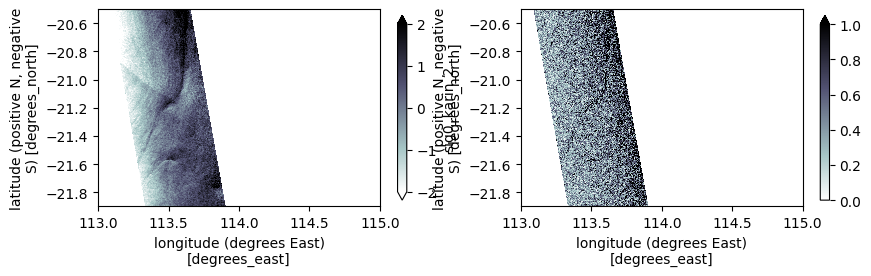

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
plot_kwargs = dict(
x="longitude",
y="latitude",
cmap="bone_r",
vmin=-2,
vmax=2,
cbar_kwargs={"shrink": 0.3},)
# ds_area['sig0_karin_2'].plot.pcolormesh(ax=ax1, **plot_kwargs)
# grad_sig0.plot.pcolormesh(ax=ax1, **plot_kwargs)
std_sig0.plot.pcolormesh(ax=ax1, **plot_kwargs)
ax1.set_xlim(area[0],area[2])
ax1.set_ylim(area[1],area[3])
ax1.set_aspect('equal')

plot_kwargs['vmin']=0
plot_kwargs['vmax']=1

grad_sig0.plot.pcolormesh(ax=ax2, **plot_kwargs)
ax2.set_xlim(area[0],area[2])
ax2.set_ylim(area[1],area[3])
ax2.set_aspect('equal')

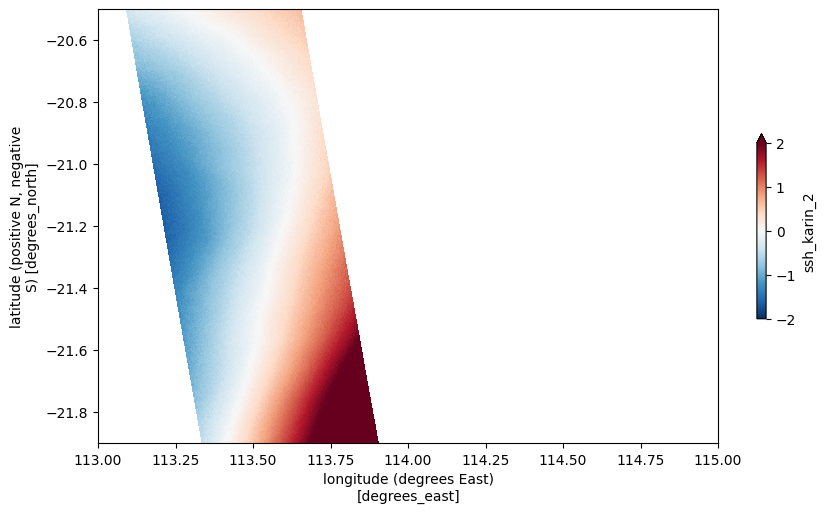

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plot_kwargs = dict(
x="longitude",
y="latitude",
cmap="RdBu_r",
vmin=-2,
vmax=2,
cbar_kwargs={"shrink": 0.3},)
(ds_area['ssh_karin_2']-ds_area['ssh_karin_2'].mean()).plot.pcolormesh(ax=ax1, **plot_kwargs)
ax1.set_xlim(area[0],area[2])
ax1.set_ylim(area[1],area[3])
ax1.set_aspect('equal')


In [16]:
ds_area['ssh_karin_2']

<xarray.DataArray 'ssh_karin_2' (num_lines: 704, num_pixels: 233)>
array([[     nan,      nan,      nan, ...,      nan, -19.8158, -19.8633],
       [     nan,      nan,      nan, ..., -19.83  , -19.8484, -19.837 ],
       [     nan,      nan,      nan, ..., -19.8818, -19.8696, -19.8808],
       ...,
       [-15.5458, -15.5621, -15.5855, ...,      nan,      nan,      nan],
       [-15.5557, -15.5672, -15.6055, ...,      nan,      nan,      nan],
       [-15.5697, -15.5646, -15.5705, ...,      nan,      nan,      nan]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 -20.42 -20.42 ... -21.98 -21.99
    longitude  (num_lines, num_pixels) float64 113.6 113.6 113.6 ... 113.4 113.4
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      sea surface height
    standard_name:  sea surface height above reference ellipsoid
    units:          m
    quality_flag:   ssh_karin_2_qual
    valid_min:      -15000000
    valid_max:      150000000
    comment:        Fully corrected sea surface height measured by KaRIn. The...